<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [79]:
import re
import string
import squarify
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from collections import Counter
from sklearn.neighbors import NearestNeighbors

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

SyntaxError: unexpected EOF while parsing (<ipython-input-2-9cfb6145a733>, line 2)

## 2) Use Spacy to tokenize / clean the listings 

In [53]:
df = pd.read_csv('data/job_listings.csv', encoding = 'utf-8')

In [54]:
df.drop(['Unnamed: 0'],axis =1).head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [55]:
from bs4 import BeautifulSoup

def clean_html(text):
    soup = BeautifulSoup(text)
    clean_text = soup.get_text()
    return clean_text

In [56]:
df['clean_html'] = df['description'].apply(lambda x:clean_html(x))

In [57]:
df['clean_html'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [58]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [59]:
def clean(text):
    new_text = text.strip("'b")
    new_text = new_text.strip("'")
    new_text = new_text.replace('\\n','')
    new_text = new_text.replace('\\','')
    new_text = re.sub("[!@#$+%*:()'-]",'',new_text) # remove puncuations
    new_text = new_text.encode("ascii", "ignore").decode("utf-8") # encode to ascii and then ignore all UTF 8
    new_text = new_text.replace('"', '')
    
    return new_text

In [60]:
df['clean'] = df['clean_html'].apply(lambda x:clean(x))

In [81]:
df['clean'][6]

'As Spotify Premium swells to over 96M subscribers around the globe, we are looking for new ways to continue to grow our subscription business. You would be joining Spotify on the Premium Analytics team, a core business strategy and insights team, as an Associate Data Scientist. In this unique position, your work would be essential in shaping how Spotify is able to grow through datadriven recommendations, new product offerings and innovative marketing efforts. You will see first hand how your work translates into new strategies, products, and consumer experiences as we enter a new phase in Spotify Premiumxe2x80x99s life.You will work with a global team of worldclass analysts, data scientists, business managers, marketers, and engineers. We are all passionate about what we do and move forward with high impact projects at a high pace. Learning and improving is part of our daily routine, and you will be free to develop your own skills and ways of working. At your fingertips youxe2x80x99ll

In [67]:
##### Your Code Here #####
nlp = spacy.load('en_core_web_md')

def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
 
    for token in doc:
        if((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!='PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [68]:
df['tokens'] = df['clean'].apply(get_lemmas)

In [69]:
df.head()

,Unnamed: 0,description,title,clean_html,clean,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",Job RequirementsConceptual understanding in Ma...,"[Job, RequirementsConceptual, understanding, M..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","Job DescriptionAs a Data Scientist 1, you will...","[Job, DescriptionAs, Data, Scientist, 1, help,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,As a Data Scientist you will be working on con...,"[Data, scientist, work, consult, business, res..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","4,969 6,756 a monthContractUnder the general ...","[4,969, , 6,756, monthContractUnder, general,..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,Location USA xe2x80x93 multiple locations2 yea...,"[Location, USA, xe2x80x93, multiple, locations..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [70]:
data = df['clean']

vect = CountVectorizer(stop_words='english', min_df = 0.05, max_df= 0.90,ngram_range=(1,2))
vect.fit(data)

sparse_dtm = vect.transform(data)

dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())

In [72]:
dtm.head()

,000,10,100,2019,abilities,ability,ability work,able,able work,academic,...,xe2x80x93,year,years,years experience,years professional,years relevant,yearsxe2x80x99,york,youll,youxe2x80x99ll
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [74]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [75]:
wc = count(df['tokens'])

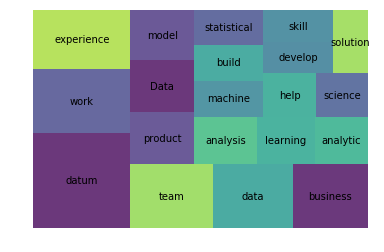

In [77]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [78]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(),columns = tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,000125,000pay,02,02115job,03,030microsoft,04,062,06366,...,zf,zfxe2x80x99s,zheng,zillow,zillows,zonesability,zoom,zuckerberg,zurich,zurichxe2x80x99s
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.104418,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [80]:
# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors = 5, algorithm = 'kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [84]:
dream_job = [ """As Spotify Premium swells to over 96M subscribers around the globe, we are looking for new ways to continue to grow our subscription business. You would be joining Spotify on the Premium Analytics team, a core business strategy and insights team, as an Associate Data Scientist. In this unique position, your work would be essential in shaping how Spotify is able to grow through datadriven recommendations, new product offerings and innovative marketing efforts. You will see first hand how your work translates into new strategies, products, and consumer experiences as we enter a new phase in Spotify Premiumxe2x80x99s life.You will work with a global team of worldclass analysts, data scientists, business managers, marketers, and engineers. We are all passionate about what we do and move forward with high impact projects at a high pace. Learning and improving is part of our daily routine, and you will be free to develop your own skills and ways of working. At your fingertips youxe2x80x99ll have access to petabytes of data, and will get the opportunity to be creative with how you drive insights and strategies from that. Above all, your work will impact the way the world experiences music.What Youxe2x80x99ll DoDevelop datadriven strategies to drive the growth of Spotify subscribersCreate and communicate actionable recommendations that improve our product conversion and migration metrics.Work with everything from advanced algorithmic data analysis and ABtest setup to business analysis and modelingWork closely with business stakeholders to understand the change they are driving and help them discover new opportunities for growth.Who Are YouYou are an openminded, creative person with an interest in analyses and data scienceYou have some professional experience working with data analysis ~1 yearYou are comfortable with the whole analytical process from identifying insight gaps to designing and running initiatives to fill themYou have worked handson synthesizing insights from data using tools such as Python, R, SQL, SAS, SPSS, Minitab and/or HadoopYou are a communicative person that values building strong relationships with colleagues and partners, you are experienced in presenting insights and recommendations to partners or clients"""]

In [85]:
new = tfidf.transform(dream_job)

nn.kneighbors(new.todense())

(array([[2.52984307e-16, 2.52984307e-16, 1.22822026e+00, 1.28195515e+00,
         1.28195515e+00]]), array([[  6,  13,  22, 141, 323]]))

In [88]:
data[141]

'About the RoleBabylist is looking for a Data Analyst to join our growing Operations and Strategy team. Partnering with our Data Scientist, you will be focused on empowering decisionmaking through data for both internal and external stakeholders. You will be responsible for delivering datadriven, actionable insights that contribute to our business. In this role, you will help scope, build, and maintain key dashboards, support stakeholders in using data to answer strategic questions, and deliver datadriven insights to drive the business forward. Your work will have immediate impact across the company and you will be in a uniquely crossdiscipline role, working with nearly every team in the company.RequirementsWhat Youxe2x80x99ll DoYou will own business intelligence and consumer insights at Babylist, both internally and externally. You will create and maintain our business dashboards and reports to track ongoing business metrics, performance of A/B tests, and special projects with brand p

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 